In [1]:
#Author Alex J. Yang, alexjieyang@outlook.com
import numpy as np
import pandas as pd
import itertools
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

In [2]:
# calculate CI using bootstrap
def calculateCI(data,method,n):
    m=int(len(data)/10) #take 10% data
    ms=[]
    for j in range(n): #number of samples
        if method=='mean':
                ms.append(np.mean(np.random.choice(data,m)))
        if method=='median':
                ms.append(np.median(np.random.choice(data,m)))
    a,b=[np.percentile(ms,2.5),np.percentile(ms,97.5)]
    return a,b

In [3]:
dfp = pd.read_csv(r'F:\NETDATA\SciSciNetPaperData\1950-2017\Paper.csv.zip')

In [4]:
dfp.columns = ['PaperID', 'Year', 'C5', 'Citation_Count', 'hit', 'Reference_Count',
       'Team_Size', 'Institution_Count', 'Country_Count', 'Title_Length',
       'Atyp_10pct_Z', 'Novelty_percentile', 'Disruption',
       'Disruption_percentile', 'RaoStirling', 'NIH_Count', 'NSF_Count',
       'Patent_Count', 'Newsfeed_Count', 'Tweet_Count', 'NCT_Count',
       'TeamAgeDiversity', 'Team_Diversity_Gini', 'TeamAgeMean', 'TeamAgeMax',
       'TeamAgeMin', 'Reference_Age_Mean', 'Reference_Age_Std', 'FieldID',
       'FieldName', 'FieldID2', 'FieldName2', 'JournalID']

In [5]:
Flst = ['Mathematics', 'Physics','Materials science', 'Engineering', 'Computer science',
       'Geography', 'Geology', 'Environmental science', 'Chemistry',
        'Medicine', 'Biology','Psychology', 'Economics', 'Business', 'Political science','Sociology']
dfp = dfp[dfp['FieldName'].isin(Flst)]
dfp.index = range(len(dfp))

In [6]:
dfp['Team_D'] = dfp['TeamAgeDiversity'].apply(lambda x:np.round(x,2)*100//4*0.04)

# Draw Fig. 3 team diversity and impact/novelty/interdisciplinarity

In [24]:
Flst = ['Mathematics', 'Physics','Materials science', 'Engineering', 'Computer science',
       'Geography', 'Geology', 'Environmental science', 'Chemistry',
        'Medicine', 'Biology','Psychology', 'Economics', 'Business', 'Political science','Sociology']
colors = sns.color_palette("mako", 16)
x = range(1 , 61)
c1 = 'C5'
c2 = 'hit'
c3 = 'RaoStirling'

In [25]:
y = dfp.groupby('Team_D')[c1].mean()
ylst = [dfp[dfp['FieldName']==F].groupby('Team_D')[c1].mean() for F in Flst]

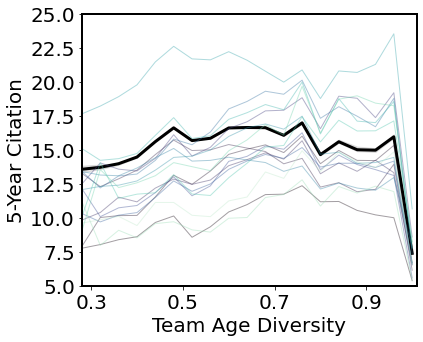

In [26]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_D',y=c1,color='grey',n_boot=30)
plt.plot(y.index, y.values,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst)):
    plt.plot(ylst[i].index, ylst[i].values,linewidth=1,alpha = .4,c=colors[i])
plt.yticks(fontsize=20,)
plt.xticks([0.3,0.5,0.7,0.9],fontsize=20,)
plt.xlabel('Team Age Diversity',fontsize = 20)
plt.ylabel('5-Year Citation',fontsize = 20)
plt.xlim(0.28,1.01)
plt.ylim(5,25)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 3\a1.svg",bbox_inches = 'tight')

In [27]:
y2 = dfp.groupby('Team_D')[c2].mean()
ylst2 = [dfp[dfp['FieldName']==F].groupby('Team_D')[c2].mean() for F in Flst]

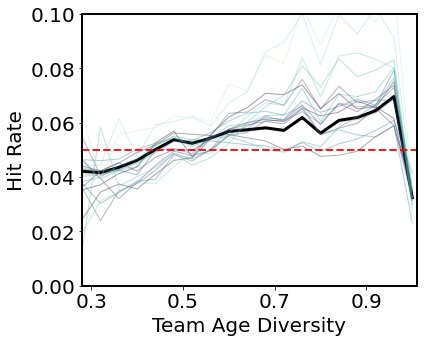

In [28]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_D',y=c2,color='grey',n_boot=30)
plt.plot(y2.index, y2.values,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst2)):
    plt.plot(ylst2[i].index, ylst2[i].values,linewidth=1,alpha = .4,c=colors[i])
plt.yticks(fontsize=20,)
plt.xticks([0.3,0.5,0.7,0.9],fontsize=20,)
plt.xlabel('Team Age Diversity',fontsize = 20)
plt.ylabel('Hit Rate',fontsize = 20)
plt.xlim(0.28,1.01)
plt.ylim(0,0.1)
plt.axhline(y = 0.05 , c = 'red',alpha=.9, linestyle = '--', linewidth = 2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 3\b1.svg",bbox_inches = 'tight')

In [29]:
y3 = dfp.groupby('Team_D')[c3].mean()
ylst3 = [dfp[dfp['FieldName']==F].groupby('Team_D')[c3].mean() for F in Flst]

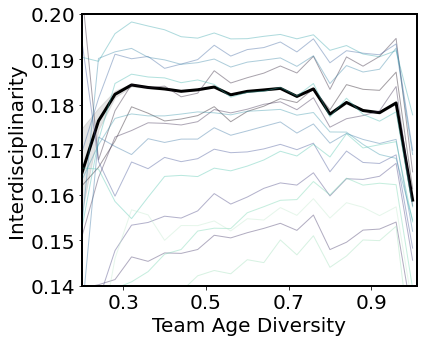

In [30]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_D',y=c3,color='grey',n_boot=30)
plt.plot(y3.index, y3.values,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst3)):
    plt.plot(ylst3[i].index, ylst3[i].values,linewidth=1,alpha = .4,c=colors[i])
plt.yticks(fontsize=20,)
plt.xticks([0.3,0.5,0.7,0.9],fontsize=20,)
plt.xlabel('Team Age Diversity',fontsize = 20)
plt.ylabel('Interdisciplinarity',fontsize = 20)
plt.xlim(0.2,1.01)
plt.ylim(0.14,.2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 3\c1.svg",bbox_inches = 'tight')

# based on team size

In [31]:
def resetTeam(x):
    if x<9:
        return x
    else:
        return 9
dfp['TeamSizeG'] = dfp['Team_Size'].apply(resetTeam)

In [32]:
colors2 = sns.color_palette("rocket", 9)

In [33]:
y = dfp.groupby('Team_D')[c1].mean()
ylst = [dfp[dfp['TeamSizeG']==G].groupby('Team_D')[c1].mean() for G in range(1,10)]

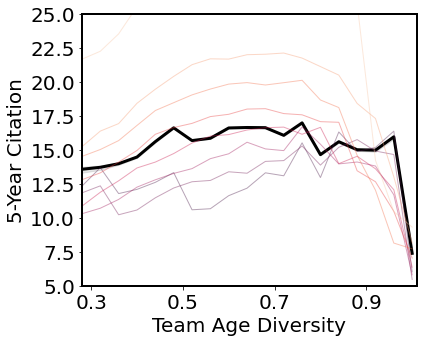

In [34]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_D',y=c1,color='grey',n_boot=30)
plt.plot(y.index, y.values,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst)):
    plt.plot(ylst[i].index, ylst[i].values,linewidth=1,alpha = .4,c=colors2[i])
plt.yticks(fontsize=20,)
plt.xticks([0.3,0.5,0.7,0.9],fontsize=20,)
plt.xlabel('Team Age Diversity',fontsize = 20)
plt.ylabel('5-Year Citation',fontsize = 20)
plt.xlim(0.28,1.01)
plt.ylim(5,25)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 3\a1_.svg",bbox_inches = 'tight')

In [35]:
y2 = dfp.groupby('Team_D')[c2].mean()
ylst2 = [dfp[dfp['TeamSizeG']==G].groupby('Team_D')[c2].mean() for G in range(1,10)]

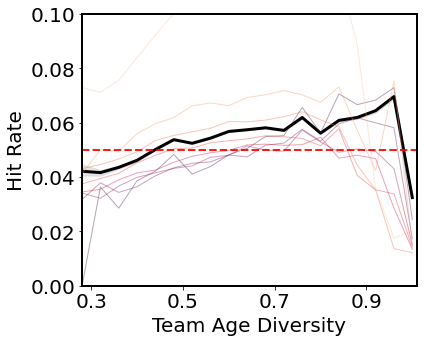

In [36]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_D',y=c2,color='grey',n_boot=30)
plt.plot(y2.index, y2.values,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst2)):
    plt.plot(ylst2[i].index, ylst2[i].values,linewidth=1,alpha = .4,c=colors2[i])
plt.yticks(fontsize=20,)
plt.xticks([0.3,0.5,0.7,0.9],fontsize=20,)
plt.xlabel('Team Age Diversity',fontsize = 20)
plt.ylabel('Hit Rate',fontsize = 20)
plt.xlim(0.28,1.01)
plt.ylim(0,0.1)
plt.axhline(y = 0.05 , c = 'red',alpha=.9, linestyle = '--', linewidth = 2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 3\b1_.svg",bbox_inches = 'tight')

In [37]:
y3 = dfp.groupby('Team_D')[c3].mean()
ylst3 = [dfp[dfp['TeamSizeG']==G].groupby('Team_D')[c3].mean() for G in range(1,10)]

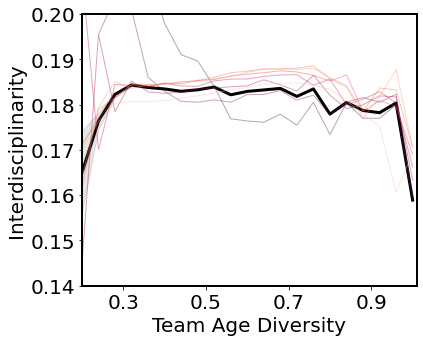

In [38]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_D',y=c3,color='grey',n_boot=30)
plt.plot(y3.index, y3.values,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst3)):
    plt.plot(ylst3[i].index, ylst3[i].values,linewidth=1,alpha = .4,c=colors2[i])
plt.yticks(fontsize=20,)
plt.xticks([0.3,0.5,0.7,0.9],fontsize=20,)
plt.xlabel('Team Age Diversity',fontsize = 20)
plt.ylabel('Interdisciplinarity',fontsize = 20)
plt.xlim(0.2,1.01)
plt.ylim(0.14,0.2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"G:\A J YANG PAPER\Collaboration\With Meijun Liu\Age diveristy\figs1\fig 3\c1_.svg",bbox_inches = 'tight')